<a href="https://colab.research.google.com/github/PioDru/colab/blob/main/fruit_360_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!wget -O banana.jpg https://upload.wikimedia.org/wikipedia/commons/8/8a/Banana-Single.jpg

--2024-12-09 21:55:43--  https://upload.wikimedia.org/wikipedia/commons/8/8a/Banana-Single.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2085213 (2.0M) [image/jpeg]
Saving to: ‘banana.jpg’

banana.jpg          100%[===================>]   1.99M  6.64MB/s    in 0.3s    

2024-12-09 21:55:44 (6.64 MB/s) - ‘banana.jpg’ saved [2085213/2085213]



In [9]:
import pandas as pd
import matplotlib.pyplot as plt

labels = pd.read_csv('labels.csv')
labels_list = labels[labels.columns[0]].tolist()

# Assuming labels.csv has a column named 'filename'

labels_list[15]

'Apple Braeburn'

In [10]:
import tensorflow as tf

def convert_to_hsv_and_grayscale(x):
    hsv = tf.image.rgb_to_hsv(x)
    gray = tf.image.rgb_to_grayscale(x)
    rez = tf.concat([hsv, gray], axis=-1)
    return rez

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ data (InputLayer)                    │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 100, 100, 4)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 100, 100, 16)        │           1,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (Activation)              │ (None, 100, 100, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool1 (MaxPooling2D)                 │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 50, 50, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2_relu (Activation)              │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool2 (MaxPooling2D)                 │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 25, 25, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3_relu (Activation)              │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool3 (MaxPooling2D)                 │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv4 (Conv2D)                       │ (None, 12, 12, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv4_relu (Activation)              │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pool4 (MaxPooling2D)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fcl1 (Dense)                         │ (None, 1024)                │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fcl2 (Dense)                         │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 131)                 │          33,667 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,286,323 (20.17 MB)

 Trainable params: 5,286,323 (20.17 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
23
Class: Banana Lady Finger
Confidence Score: 0.7126475


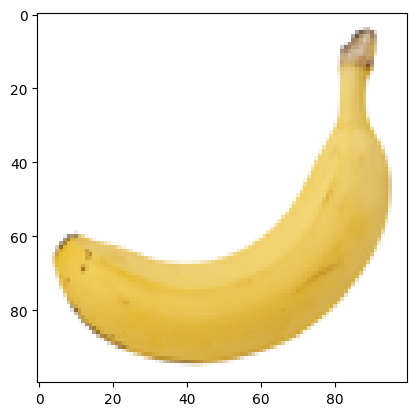

In [11]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("model.keras", compile=False, custom_objects={"convert_to_hsv_and_grayscale": convert_to_hsv_and_grayscale})
model.summary()
#model = load_model("C:\Users\depie\Downloads\converted_keras\keras_model.h5", compile=False)
#model = load_model("C:\keras_model.h5", compile=False)

# Load the labels
#class_names = open("labels.txt", "r").readlines()
class_names = labels_list

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
#data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
data = np.ndarray(shape=(1, 100, 100, 3), dtype=np.float32)

# Replace this with the path to your image
#image = Image.open("test_data/avatar.png").convert("RGB")
image = Image.open("banana.jpg").convert("RGB")
#image = Image.open("banana_r_304_100.jpg").convert("RGB")
#image = Image.open("avocado_49_100.jpg").convert("RGB")
#image = Image.open("kiwi_35_100.jpg").convert("RGB")
#image = Image.open("apple_grape.jpg").convert("RGB")
#image = Image.open("apple_0_100.jpg").convert("RGB")
image = image.resize((100, 100))
image_np = np.array(image)
img = np.array([image])

# turn the image into a numpy array
image_array = np.asarray(image)
plt.imshow(image_array/255)

# Normalize the image
#normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
#normalized_image_array = (image_array.astype(np.float32) / 255) - 1

# Load the image into the array
#data[0] = normalized_image_array
data[0] = image_array

# Predicts the model
prediction = model.predict(data)
#print(prediction)
index = np.argmax(prediction)
print(index)

class_name = class_names[index]

confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name, end="\n")
print("Confidence Score:", confidence_score, end="\n")

(100, 100, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Banana Lady Finger


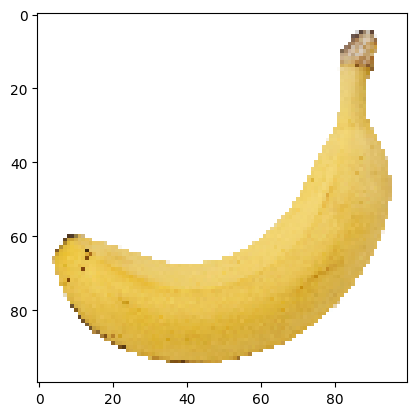

In [12]:
img4 = tf.keras.preprocessing.image.load_img('banana.jpg', target_size=(100, 100))
img4 = tf.keras.preprocessing.image.img_to_array(img4)
plt.imshow(img4.astype(np.int32))
print(img4.shape)

image4 = np.array([img4])

class_names[np.argmax(model.predict(image4))]
print(class_names[np.argmax(model.predict(image4))])